# Homework Assignment 4

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

Load the `'parks.csv'` data set and obtain the `value_counts()` for each state. Use the Pandas `plot()` function to create a `'bar'` chart with the `value_counts()`. Which state has the lowest number of National Parks?

In [45]:
parksdata=pd.read_csv('parks.csv')
print(parksdata)

                  name                 location   date_estb   area_2019  \
0               Acadia                    Maine  1919-02-26    49076.63   
1       American Samoa           American Samoa  1988-10-31     8256.67   
2               Arches                     Utah  1971-11-12    76678.98   
3             Badlands             South Dakota  1978-11-10   242755.94   
4             Big Bend                    Texas  1944-06-12   801163.21   
..                 ...                      ...         ...         ...   
58           Wind Cave             South Dakota  1903-01-09    33970.84   
59  Wrangell-St. Elias                   Alaska  1980-12-02  8323146.48   
60         Yellowstone  Wyoming, Montana, Idaho  1872-03-01  2219790.71   
61            Yosemite               California  1890-10-01   761747.50   
62                Zion                     Utah  1919-11-19   147242.66   

    visitors_2019                                        description  
0       3437286.0  Covering 

In [8]:
Q1 = (parksdata.value_counts('location'))
print(Q1)

location
California                   9
Alaska                       8
Utah                         5
Colorado                     4
Florida                      3
Washington                   3
Arizona                      3
Hawaii                       2
Texas                        2
South Dakota                 2
New Mexico                   2
Wyoming                      1
West Virginia                1
Ohio                         1
Virginia                     1
U.S. Virgin Islands          1
South Carolina               1
Oregon                       1
Nevada                       1
North Dakota                 1
North Carolina, Tennessee    1
American Samoa               1
Montana                      1
Missouri                     1
Minnesota                    1
Michigan                     1
Maine                        1
Kentucky                     1
Indiana                      1
Arkansas                     1
Wyoming, Montana, Idaho      1
dtype: int64


There is a tie for lowest number of national parks (at 1 park) by state. Additonally, Idaho shares 1 park with two other states having more than one park.


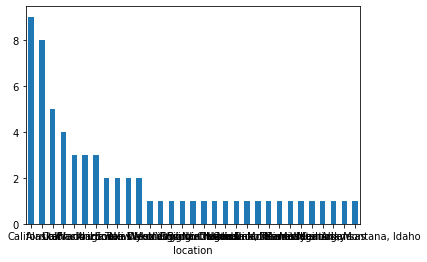

In [15]:
Q1.plot.bar(x='location', y='val', rot=0)
print('There is a tie for lowest number of national parks (at 1 park) by state. Additonally, Idaho shares 1 park with two other states having more than one park.')

### Question 2

Group the `parks` data by `location` to find the `mean` number of `visitors_2019` for each state, then `plot()` these results using a `'bar'` chart again. Does this graph look the same or different from the graph in Question 1? (**Note:** Remember to pass `sort_values(ascending=True)` after your `groupby` aggregation to plot the values in descending order from least-visited states to most-visited!)

In [25]:
Q2 = parksdata.groupby(['location']).mean('visitors_2019').sort_values('visitors_2019', ascending=True)
print(Q2)

                              area_2019  visitors_2019
location                                              
Michigan                   5.717903e+05   2.641000e+04
American Samoa             8.256670e+03   6.000600e+04
Nevada                     7.718000e+04   1.318020e+05
U.S. Virgin Islands        1.505253e+04   1.333980e+05
South Carolina             2.647647e+04   1.594450e+05
Alaska                     4.065756e+06   2.289958e+05
Minnesota                  2.182224e+05   2.329740e+05
Texas                      4.437652e+05   3.263325e+05
New Mexico                 9.655538e+04   5.247380e+05
Kentucky                   5.401191e+04   5.515900e+05
Florida                    5.822036e+05   6.353407e+05
North Dakota               7.044689e+04   6.916580e+05
Oregon                     1.832240e+05   7.045120e+05
South Dakota               1.383634e+05   7.931740e+05
Hawaii                     1.794350e+05   1.181385e+06
California                 7.059010e+05   1.404348e+06
Virginia  

The Q2 graph is different than Q1 as Q1 compares number of parks to Q2s average number of visitors. For example, while California has the most national parks, it is not in the top ten of average park visitors in 2019.


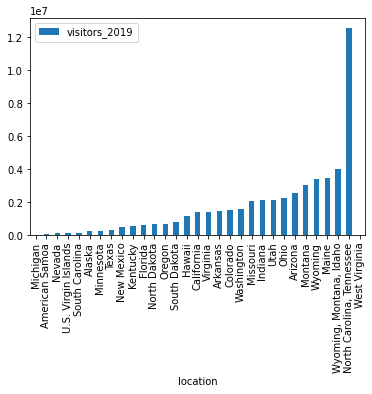

In [32]:
Q2.plot.bar(y='visitors_2019')
print('The Q2 graph is different than Q1 as Q1 compares number of parks to Q2s average number of visitors. For example, while California has the most national parks, it is not in the top ten of average park visitors in 2019.')

# Question 3

Are older parks more popular than newer parks? To find out, first create a new variable for the `'year'` of establishment by passing the `'date_estb'` column in the function `pd.DatetimeIndex().year` (we will cover this in more depth in Class 5.) To account for multiple parks being opened in the same year, create a new DataFrame grouping the `parks.csv` data by `'year'` and summing the `'visitors_2019'` for each year and `reset_index()`. Then create a line plot with `'year'` on the x-axis and `'visitors_2019'` on the y-axis using this grouped DataFrame.

Generally, yes there were more visitors in 2019 to older parks, considering them more popular than newer parks.


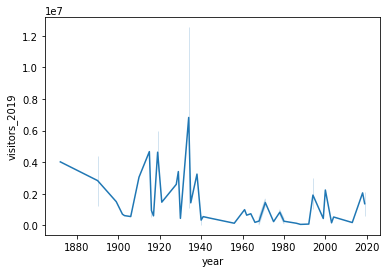

In [77]:
parksdata['year'] = pd.DatetimeIndex(parksdata['date_estb']).year
parksdf = parksdata['visitors_2019'].groupby(parksdata['year'])

sns.lineplot(x='year', y='visitors_2019', data=parksdata)
print('Generally, yes there were more visitors in 2019 to older parks, considering them more popular than newer parks.')

### Question 4

Use Seaborn's `boxplot` function to compare the number of visitors to the national parks in Texas, Colorado, and Utah. Though these states have the largest numbers of national parks, do they see the same number of visitors? (**Note:** You will have to pass a subset of the DataFrame to the `data` argument to select only these three states. Recall that `.isin()` can take a list of strings when creating a Boolean mask for your data.)

Utah, Texas, and Colorado so not see the same number of visitors.


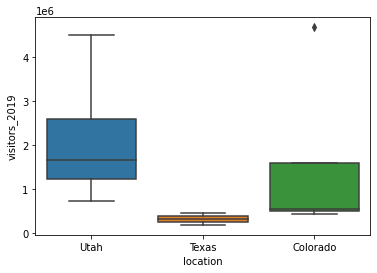

In [54]:
parksdf2 = parksdata[parksdata['location'].isin(['Texas', 'Colorado', 'Utah'])]
parksdf2.head(n=3)

sns.boxplot(y='visitors_2019', x='location', data=parksdf2)


print('Utah, Texas, and Colorado so not see the same number of visitors.')

### Question 5

Do people flock to larger parks? Plot a scatterplot of `area_2019` by `visitors_2019` using Seaborn's `regplot` function.

No, people flock to smaller parks (by area).


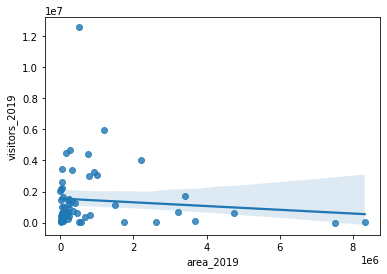

In [88]:
sns.regplot(x='area_2019', y='visitors_2019', data=parksdata)
print('No, people flock to smaller parks (by area).')

### Question 6

Load the data `'nyc_buildings.csv'` and create a scatterplot of `height` and `floors`. Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?

In [24]:
nycdata=pd.read_csv('nyc_buildings.csv')
print(nycdata)

     rank                         name  height  floors  year  \
0       1       One World Trade Center    1776     104  2014   
1       2           Central Park Tower    1550      98  2020   
2       3         111 West 57th Street    1428      84  2021   
3       4               One Vanderbilt    1401      59  2020   
4       5              432 Park Avenue    1396      88  2015   
..    ...                          ...     ...     ...   ...   
140   141                    The Orion     604      60  2006   
141   142           590 Madison Avenue     603      41  1983   
142   143         250 West 55th Street     602      39  2013   
143   144          Eleven Times Square     601      40  2011   
144   145  1166 Avenue of the Americas     600      44  1974   

                   address             street  
0        285 Fulton Street      Fulton Street  
1     225 West 57th Street   West 57th Street  
2     111 West 57th Street   West 57th Street  
3    One Vanderbilt Avenue  Vanderbilt 

Q6 shows a stronger relationship between variables than Q5.


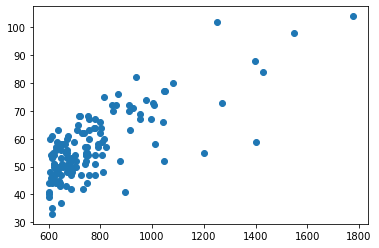

In [5]:
plt.scatter(x='height', y='floors', data=nycdata)
print('Q6 shows a stronger relationship between variables than Q5.')

### Question 7

Group the `nyc_buildings` data by `year` and `sum` the total `height` for all buildings. Plot the resulting DataFrame as a line plot. Are the tallest buildings in New York relatively old or relatively young?

In [95]:
Q7 = nycdata.groupby(['year']).sum('height').sort_values('year', ascending=True)
print(Q7)

      rank  height  floors
year                      
1909    77     700      50
1913    41     792      57
1928   131     615      33
1929   220    1281     104
1930   123    2646     201
1931   383    3956     315
1932   119    1606     117
1933    30     850      70
1960    74     707      52
1961    34     813      60
1963   118    1495     109
1964   139     609      46
1966   118     630      44
1967   186    1336      99
1968    75     705      50
1969   351    1899     144
1970   226    1285      95
1971   177    1378      99
1972   521    4123     313
1973    62     743      54
1974   334    1933     136
1976   128     620      51
1977    23     915      63
1982   219    1293     107
1983   248    1250      78
1985   204    1331     112
1986   327    2789     200
1987    33     814      75
1988   123     628      56
1989   325    2823     179
1990   261    2056     145
1991   176    1380     114
1992    79     692      48
1993    87     682      52
1999    35     809      48
2

The tallest buildings in NYC are relatively young.


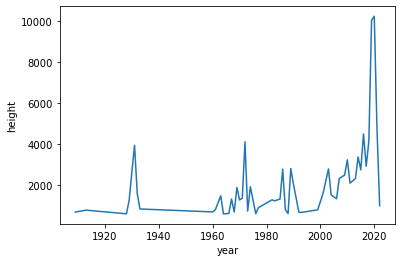

In [99]:
sns.lineplot(x='year', y='height', data=Q7)
print('The tallest buildings in NYC are relatively young.')

### Question 8

Are there streets in New York where tall buildings are especially concentrated? Group the data by `street` and `sum` the `height` of the buildings. Reset the index and sort the values from tallest to smallest. Create a bar plot of the top 10 streets with the tallest total heights. Is anything surprising? (**Note:** To view the x-axis labels more clearly, first declare your subplots with `f, ax = plt.subplots()` before creating your barplot. In the barplot options, set `ax=ax`. Then you can use `ax.set_xticklabels` and pass the list of top ten street names as the labels while explicitly declaring the degrees of rotation you would like to see.)

In [40]:
Q8 = nycdata.groupby(['street']).sum('height').sort_values('height', ascending=False)
print(Q8)


                     rank  height  floors   year
street                                          
Park Avenue           731    7812     531  19788
Broadway              664    7303     517  19789
Sixth Avenue         1004    7038     495  19807
West 57th Street      345    6772     488  13993
Fifth Avenue          829    6509     542  17810
...                   ...     ...     ...    ...
Hoyt Street           129     620      51   2020
East 49th Street      133     615      44   1985
Third Avenue          132     615      47   1970
Schermerhorn Street   138     610      54   2016
West 55th Street      143     602      39   2013

[68 rows x 4 columns]


                  rank  height  floors   year
street                                       
Park Avenue        731    7812     531  19788
Broadway           664    7303     517  19789
Sixth Avenue      1004    7038     495  19807
West 57th Street   345    6772     488  13993
Fifth Avenue       829    6509     542  17810
Lexington Avenue   281    4063     295   9828
Greenwich Street   115    3712     278   8057
Madison Avenue     507    3320     208   9804
West 42nd Street   545    3224     300  10050
West 34th Street   116    2539     166   6013


<AxesSubplot:ylabel='height'>

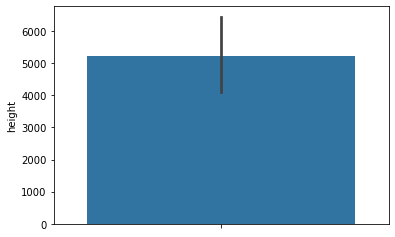

In [74]:
top10 = Q8.iloc[:10]
print(top10)

sns.barplot(y='height', data=top10)


### Question 9

Look at the distribution of `floors` in the `nyc_buildings` data using Seaborn's `distplot` function. Use 40 bins. Then `print` the `mean` number of `floors` in the data set -- does this agree with what you would have expected from looking at the graph?

C:\Users\Abbie Joyce\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floors', ylabel='Density'>

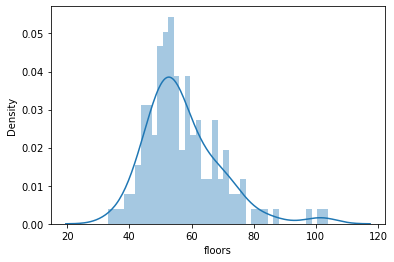

In [25]:
Q9 = nycdata['floors']
sns.distplot(Q9, bins=40)


In [28]:
print(nycdata['floors'].mean())

print('Yes, the mean of 57.15 floors agrees with the distplot in Q9.')

57.15172413793103
Yes, the mean of 57.15 floors agrees with the distplot in Q9.


### Question 10

Are there height differences between even-numbered floors and odd-numbered floors in New York? Recall that we can use `np.where()` to create a new variable, and that the modulus operator `%` will return the remainder. Create a binary variable called `'even'` where the field is `True` for an even number of floors and `False` for odd. Using Seaborn's `catplot` function, set `col='even'` and `kind='box'` to compare the two different `y='height'`. What do you observe?

Even floors have a higher height than odd floors.


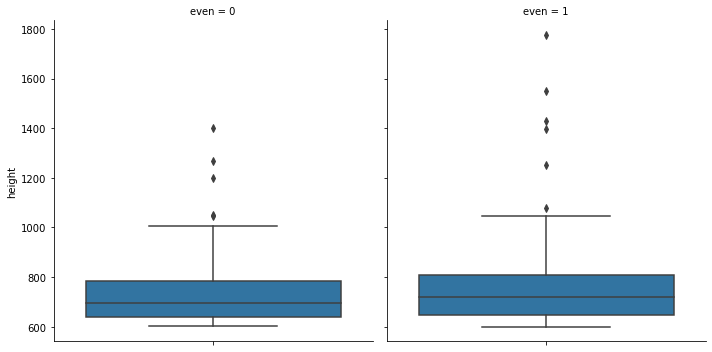

In [155]:
nycdata['even']=np.where(nycdata['floors']%2==0,1,0)
sns.catplot(y='height', col='even', kind='box', data=nycdata)
print('Even floors have a higher height than odd floors.')